<a href="https://colab.research.google.com/github/arfanrifqi/loan_prediction/blob/main/loan_prediction(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
load_data = pd.read_csv('/content/gdrive/MyDrive/dataset/credit_risk/loan_data_2007_2014.csv')

load_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#**describe statistic**

In [9]:
load_data.describe(include='all')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285,466285.000000,466285.000000,466285,466285,438697,445277,466285,4.662810e+05,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466285.000000,466256.000000,466256,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,465909,466285.000000,239071,466243,466140.000000,98974.000000,466285.0,466285,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,205475,11,6,NaN,3,91,9,2,466285,124436,14,63099,888,50,NaN,NaN,664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,100,103,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,NaN,NaN,Oct-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-16,NaN,Feb-16,Jan-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,337953,NaN,NaN,136929,31686,5399,150049,235875,NaN,168055,38782,224226,466276,1,234,274195,164075,5304,71450,NaN,NaN,3674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179620,NaN,208393,327699,NaN,NaN,NaN,466285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,NaN,13.829236,432.061201,NaN,NaN,NaN,NaN,NaN,7.327738e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.218758,0.284678,NaN,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,NaN,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,NaN,3123.913796,NaN,NaN,0.009085,42.852547,1.0,NaN,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,NaN,4.357587,243.485550,NaN,NaN,NaN,NaN,NaN,5.496357e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.851121,0.797365,NaN,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,NaN,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,NaN,5554.737393,NaN,NaN,0.108648,21.662591,0.0,NaN,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,NaN,NaN,NaN,NaN,1.896000e+03,NaN,NaN,Na

In [10]:
pd.options.display.max_columns = 50
print(load_data.head())

   Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT   

In [ ]:
load_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [11]:
df_load = load_data[['loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type','acc_now_delinq',
       'tot_cur_bal','total_rev_hi_lim']].copy()

df_load.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,...,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
1,2500,2500,2500.0,60 months,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,...,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
2,2400,2400,2400.0,36 months,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,...,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
3,10000,10000,10000.0,36 months,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,...,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN
4,3000,3000,3000.0,60 months,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,...,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN


In [12]:
df_load.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,4
1,float64,27
2,object,22


#**value count of categorical columns**

In [13]:
cat = ['term','grade','sub_grade','emp_title','emp_length',
       'home_ownership','verification_status','issue_d','loan_status',
       'pymnt_plan','purpose','title','addr_state','earliest_cr_line',
       'initial_list_status','application_type','policy_code']

In [14]:
df_load[cat].describe(include='all')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,earliest_cr_line,initial_list_status,application_type,policy_code
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,466265,466285,466256,466285,466285,466285.0
unique,2,7,35,205475,11,6,3,91,9,2,14,63099,50,664,2,1,NaN
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,debt_consolidation,Debt consolidation,CA,Oct-00,f,INDIVIDUAL,NaN
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,274195,164075,71450,3674,303005,466285,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [15]:
for col in cat:
  print(f'''value count kolom {col} :''')
  print(df_load[col].value_counts())
  print()

value count kolom term :
 36 months    337953
 60 months    128332
Name: term, dtype: int64

value count kolom grade :
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

value count kolom sub_grade :
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64

value count kolom emp_title :
Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eas

In [19]:
df_load['term_months'] = df_load['term'].replace([' 36 months',' 60 months'],['36','60'])
df_load['term_months'].unique()

array(['36', '60'], dtype=object)

In [21]:
term_num = ['term_months']

df_load[term_num] = df_load[term_num].apply(pd.to_numeric, errors='coerce', axis=1)
print(df_load['term_months'].dtypes)

int64


In [17]:
df_load['loan_status'] = df_load['loan_status'].replace(['Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off'],['Fully Paid','Charged Off'])

In [18]:
df_load['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'],
      dtype=object)

In [23]:
bad_status = [
    'Charged Off',
    'Default',
    'Late (31-120 days)'
]
df_load['loan_status'] = np.where(df_load['loan_status'].isin(bad_status), 1, 0)

In [27]:
df_load['loan_status'].head()

0    0
1    1
2    0
3    0
4    0
Name: loan_status, dtype: int64

#**correlation**

##**numerical**

In [28]:
corr = df_load.corr(method = 'spearman')
new_corr =corr.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1)
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)

In [29]:
new_corr[new_corr.correlation >= 0.5]

,level_0,level_1,correlation
577,out_prncp_inv,out_prncp,0.999999
33,funded_amnt,loan_amnt,0.998809
67,funded_amnt_inv,funded_amnt,0.994772
645,total_pymnt_inv,total_pymnt,0.993899
66,funded_amnt_inv,loan_amnt,0.993207
815,collection_recovery_fee,recoveries,0.976526
100,installment,funded_amnt,0.966033
99,installment,loan_amnt,0.964087
101,installment,funded_amnt_inv,0.960155
678,total_rec_prncp,total_pymnt,0.946659


In [31]:
corr_with_target = df_load.corrwith(df_load.loan_status).sort_values(ascending = False).abs().to_frame('correlation_with_target').reset_index().head(36)
unique_values = df_load.nunique().to_frame('unique_values').reset_index()
corr_with_unique = pd.merge(corr_with_target, unique_values, on = 'index', how = 'inner')
corr_with_unique

,index,correlation_with_target,unique_values
0,loan_status,1.000000,2
1,recoveries,0.441171,22773
2,collection_recovery_fee,0.299227,20275
3,total_rec_late_fee,0.147750,5808
4,inq_last_6mths,0.073102,28
5,term_months,0.063565,2
6,revol_util,0.050207,1269
7,dti,0.048102,3997
8,mths_since_last_record,0.022837,123
9,installment,0.013936,55622


## **categorical**

In [33]:
from scipy.stats import chi2_contingency

In [55]:
cat_features = ['term','grade','emp_title','home_ownership','verification_status','pymnt_plan',
                'purpose','title','addr_state','initial_list_status','application_type','emp_length']

error = 0.05

for column in cat_features:
    table = df_load[[column, 'loan_status']].pivot_table(index='loan_status',
                                                   columns=column,
                                                   aggfunc=lambda x: len(x))
    _, p_value, _, _ = chi2_contingency(table)

    print('Variable:', column)
    print('p-value: ', p_value)
    if p_value < error:
        print('Variabel ' + column + ' dan loan_status berkorelasi')
    else:
        print('Variabel ' + column + ' dan loan_status tidak berkorelasi')
    print('')

Variable: term
p-value:  0.0
Variabel term dan loan_status berkorelasi

Variable: grade
p-value:  0.0
Variabel grade dan loan_status berkorelasi

Variable: emp_title
p-value:  nan
Variabel emp_title dan loan_status tidak berkorelasi

Variable: home_ownership
p-value:  nan
Variabel home_ownership dan loan_status tidak berkorelasi

Variable: verification_status
p-value:  1.1011712895478403e-208
Variabel verification_status dan loan_status berkorelasi

Variable: pymnt_plan
p-value:  0.007185645086446904
Variabel pymnt_plan dan loan_status berkorelasi

Variable: purpose
p-value:  0.0
Variabel purpose dan loan_status berkorelasi

Variable: title
p-value:  nan
Variabel title dan loan_status tidak berkorelasi

Variable: addr_state
p-value:  nan
Variabel addr_state dan loan_status tidak berkorelasi

Variable: initial_list_status
p-value:  7.216184133923969e-236
Variabel initial_list_status dan loan_status berkorelasi

Variable: application_type
p-value:  1.0
Variabel application_type dan loan_

#**Exploratory Data Analysis categorical**

In [35]:
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

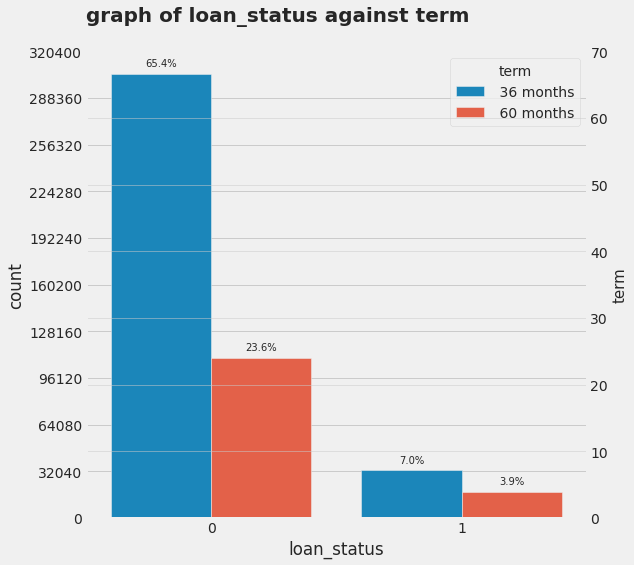

In [53]:
ncount = len(df_load['term'])

plt.figure(figsize=(8,8))
ax = sns.countplot(x="loan_status",hue='term', data=df_load)
plt.title('graph of loan_status against term',fontsize=20, loc='left', pad=30, fontweight='bold')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.1f}%".format(100.*y/ncount),  
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points',
                        fontsize=10)
 
ax2=ax.twinx()
ax2.yaxis.tick_right()
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.grid(axis='y', linestyle='-', linewidth=0.5)   
ax2.set_ylim(0,70)

plt.ylabel('term', fontsize=15)
plt.xlabel('loan_status', fontsize=15)

plt.show()

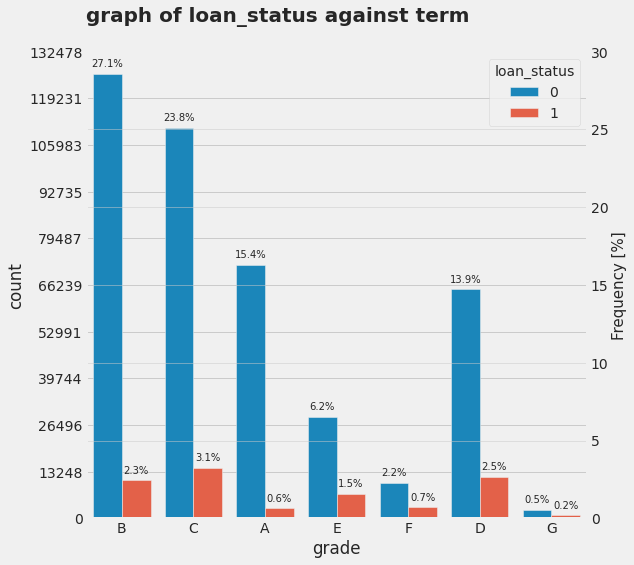

In [52]:
ncount = len(df_load['loan_status'])

plt.figure(figsize=(8,8))
ax = sns.countplot(x="grade",hue='loan_status', data=df_load)
plt.title('graph of loan_status against term',fontsize=20, loc='left', pad=30, fontweight='bold')
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.1f}%".format(100.*y/ncount),  
                        (p.get_x() + p.get_width() / 2., 
                         p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points',
                        fontsize=10)
 
ax2=ax.twinx()
ax2.yaxis.tick_right()
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.grid(axis='y', linestyle='-', linewidth=0.5)   
ax2.set_ylim(0,30)

plt.ylabel('Frequency [%]', fontsize=15)
plt.xlabel('loan_status', fontsize=15)

plt.show()

In [56]:
df_load['issue_d'] = pd.to_datetime(df_load['issue_d'], format='%b-%y')

In [57]:
df_load['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [60]:
from pandas.core.indexes.datetimes import DatetimeIndex

df_load['issue_year'] = pd.to_datetime(df_load['issue_d'])
df_load['issue_year'] = DatetimeIndex(df_load['issue_year']).year

In [61]:
df_load['issue_year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: int64

In [68]:
df_load['verification_status'].replace({'Source Verified':'Verified'})

0             Verified
1             Verified
2         Not Verified
3             Verified
4             Verified
              ...     
466280        Verified
466281        Verified
466282        Verified
466283        Verified
466284        Verified
Name: verification_status, Length: 466285, dtype: object

In [88]:
d={}
 
for i in df_load.columns:
    d[i] = pd.concat([df_load.groupby(i).loan_status.sum(),df_load[i].value_counts(),round(df_load.groupby(i).loan_status.sum()*100/df_load[i].value_counts(),2)], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'loan_status':'bag_loan', i:'Total_Customers', 0:'perc_of_total_cust'},)

In [89]:
def analysis_chart(variable):
  plt.figure(figsize=(30,20))
  fig, ax = plt.subplots()
  title1 = 'Customers loan status analysed by ' + variable
  plt.title(title1, fontsize=15)

  line1 = ax.plot(d[variable][variable],d[variable]['bag_loan'], color='lightskyblue', label = 'bag_loan')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
 
  plt.xlabel (variable, fontsize=10) 

  for tick in ax.get_xticklabels():
    tick.set_rotation(90)

  ax2=ax.twinx()
 
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'loan status as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer loan status', linestyle='dashed')

  plt.ylabel ('percentage of customers bad loan', fontsize=10)
  
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1), fontsize=10)

  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)
  plt.grid(None)
  

<Figure size 2160x1440 with 0 Axes>

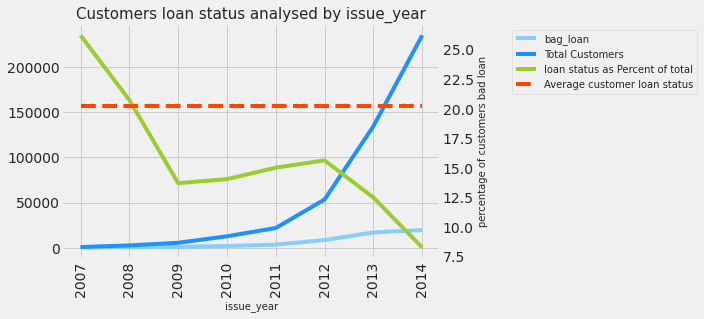

In [90]:
analysis_chart('issue_year')

#**Exploratory Data Analysis numerical**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

<Figure size 432x288 with 0 Axes>

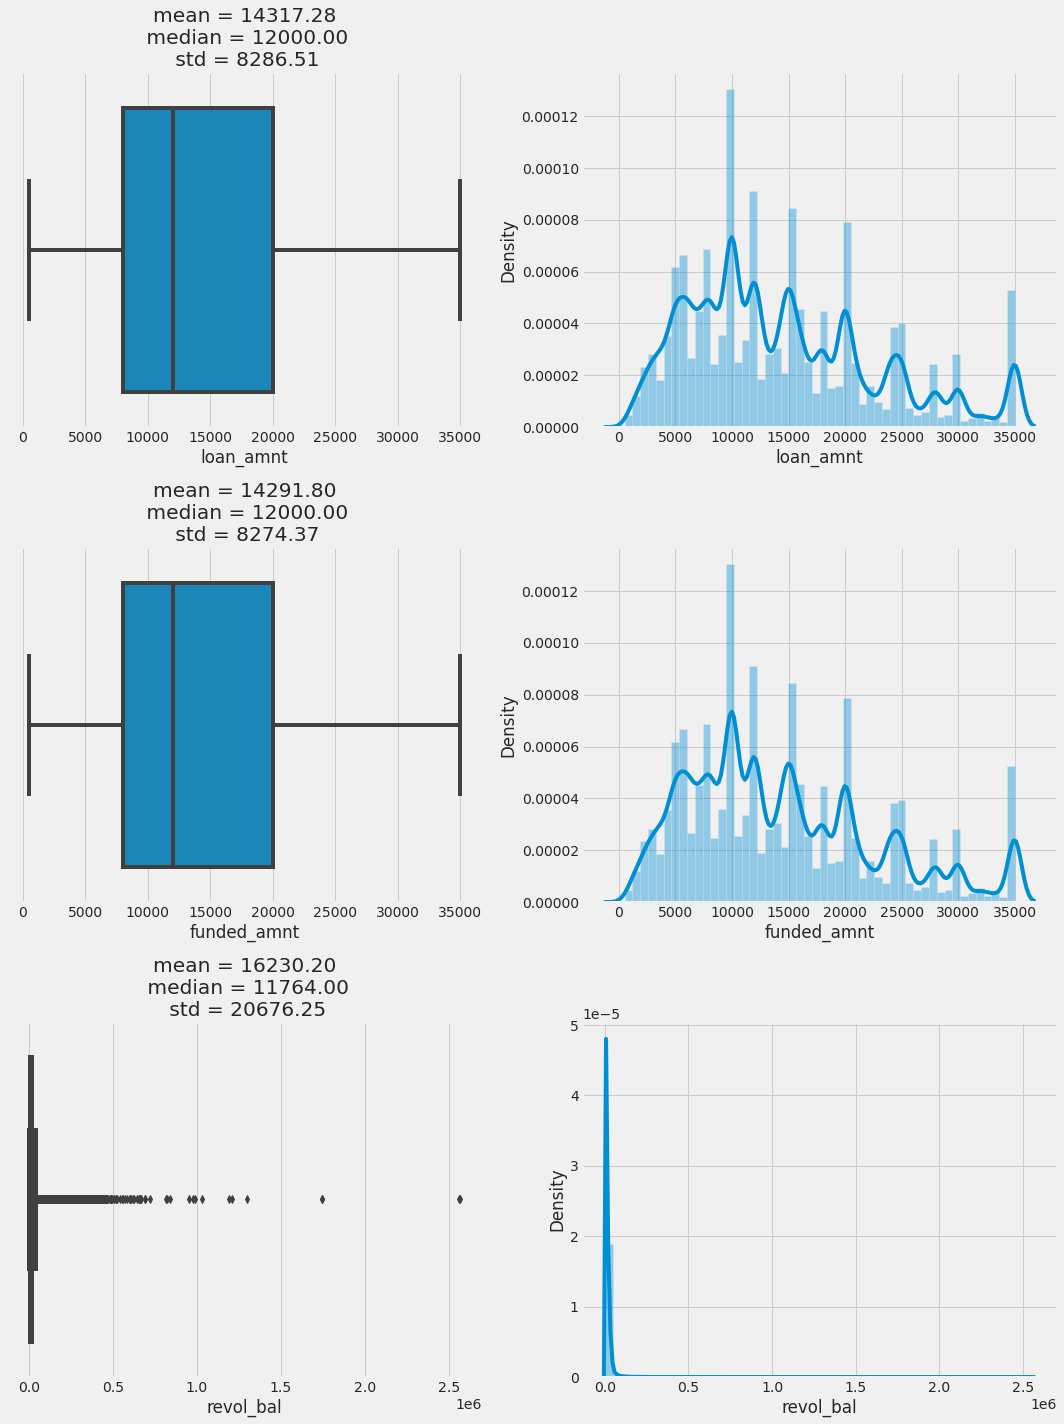

In [ ]:
num_int = ['loan_amnt','funded_amnt','revol_bal']

plt.clf()
  
def observasi_num(features):  
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    for i, kol in enumerate(features):
	    sns.boxplot(df_load[kol], ax = axs[i][0])
	    sns.distplot(df_load[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df_load[kol].mean(), df_load[kol].median(), df_load[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()   
observasi_num(num_int) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

<Figure size 432x288 with 0 Axes>

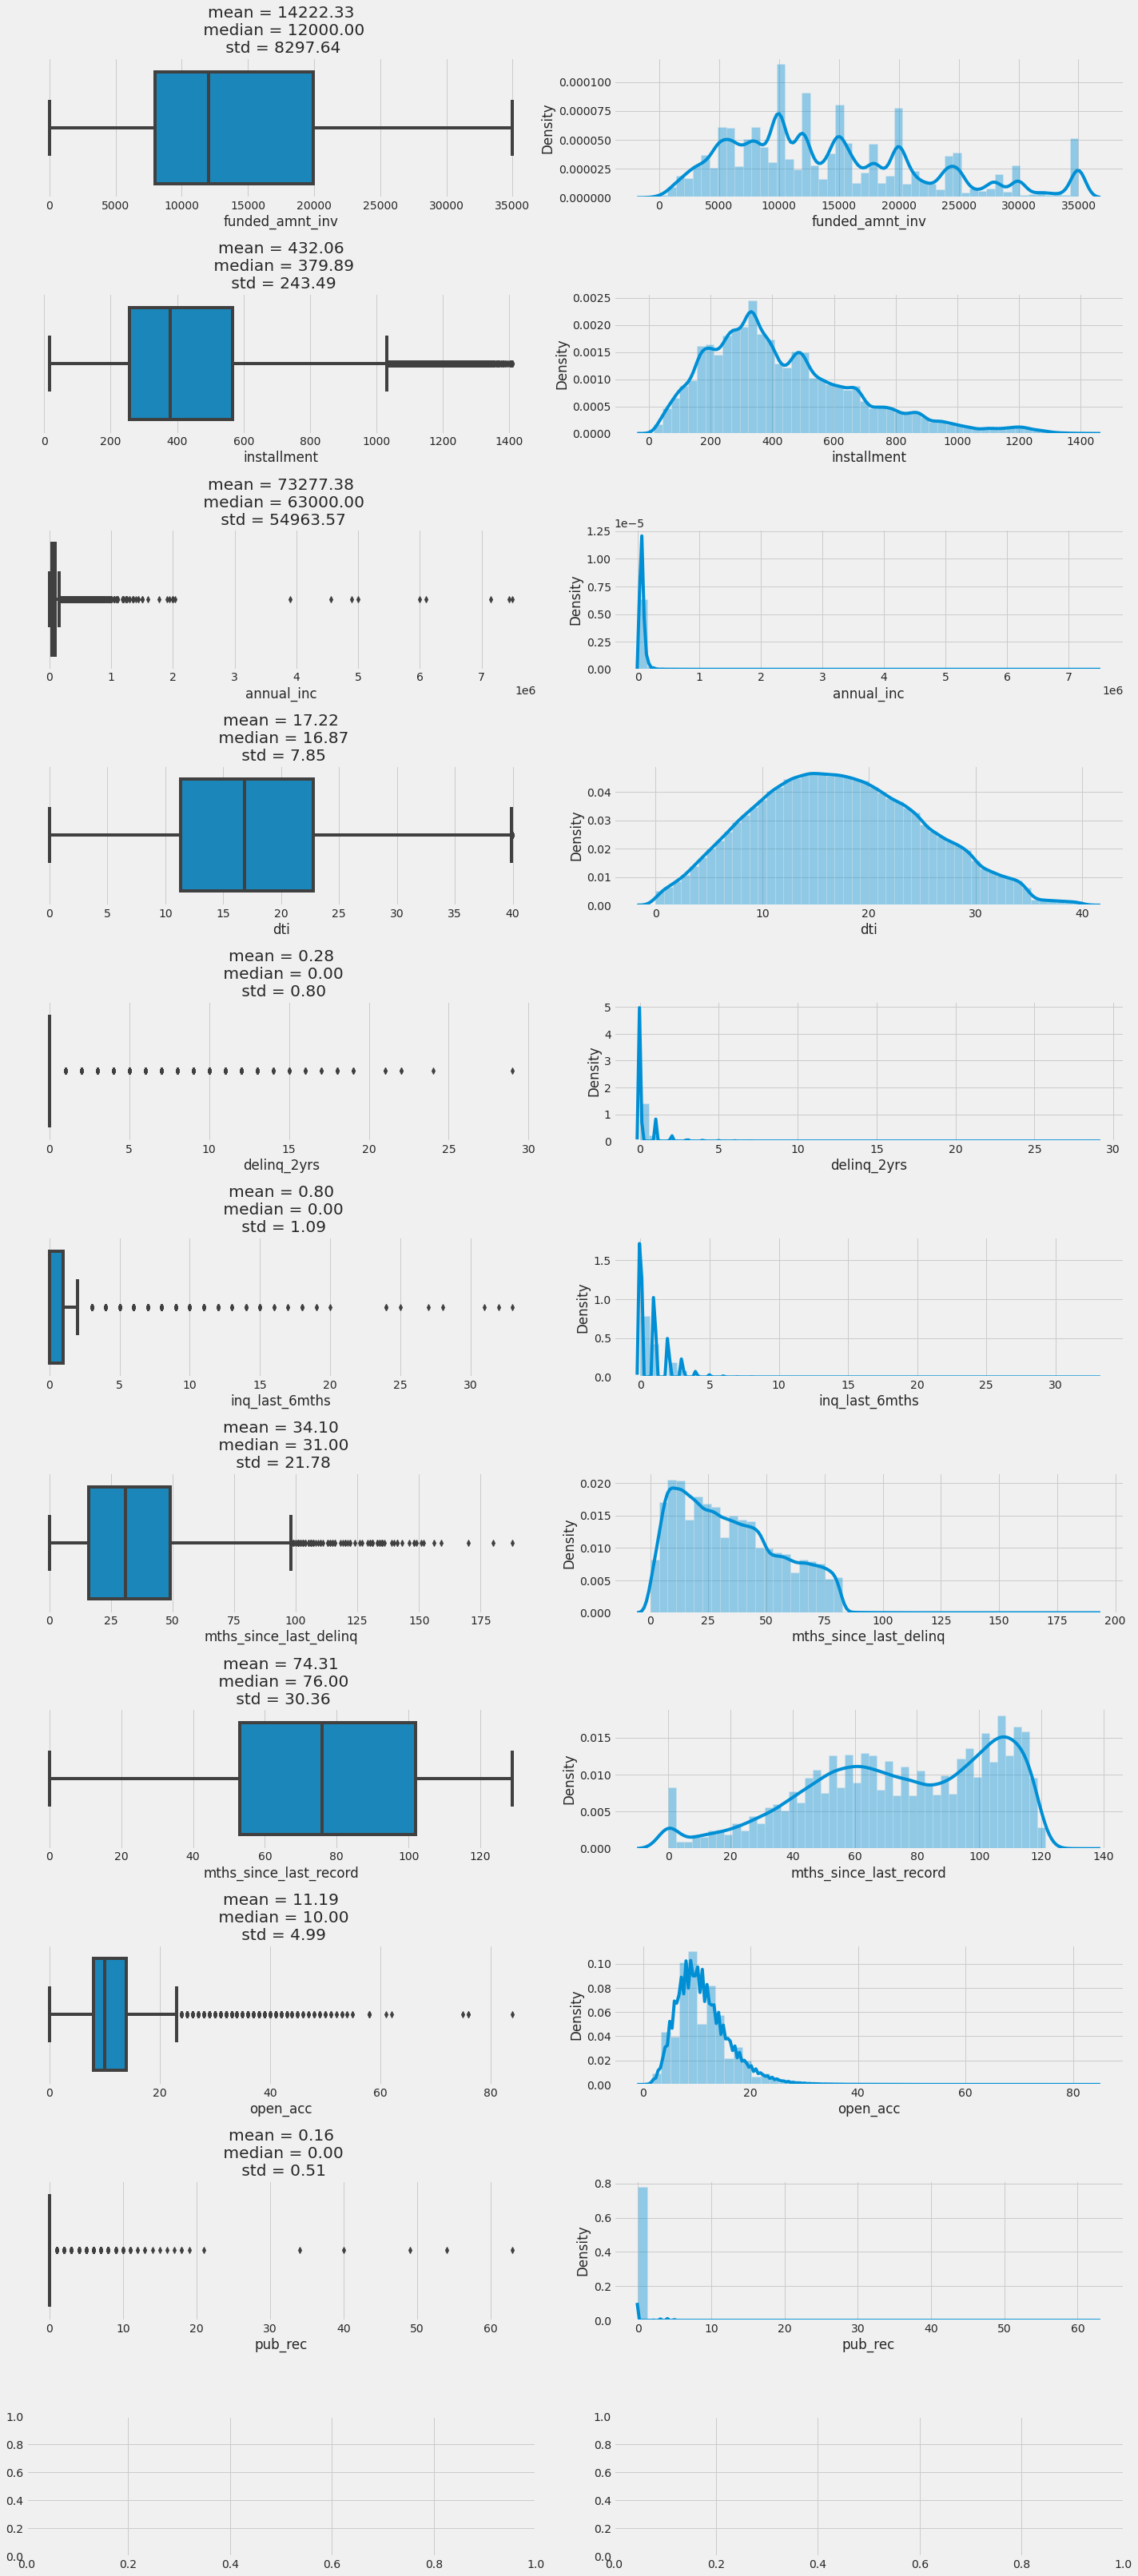

In [ ]:
num_float = ['funded_amnt_inv','installment','annual_inc',
             'dti','delinq_2yrs','inq_last_6mths',
             'mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec']


plt.clf()
  
def observasi_num(features):  
    fig, axs = plt.subplots(11, 2, figsize=(20, 45))
    for i, kol in enumerate(features):
	    sns.boxplot(df_load[kol], ax = axs[i][0])
	    sns.distplot(df_load[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df_load[kol].mean(), df_load[kol].median(), df_load[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()   
observasi_num(num_float)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomness: float)
 

<Figure size 432x288 with 0 Axes>

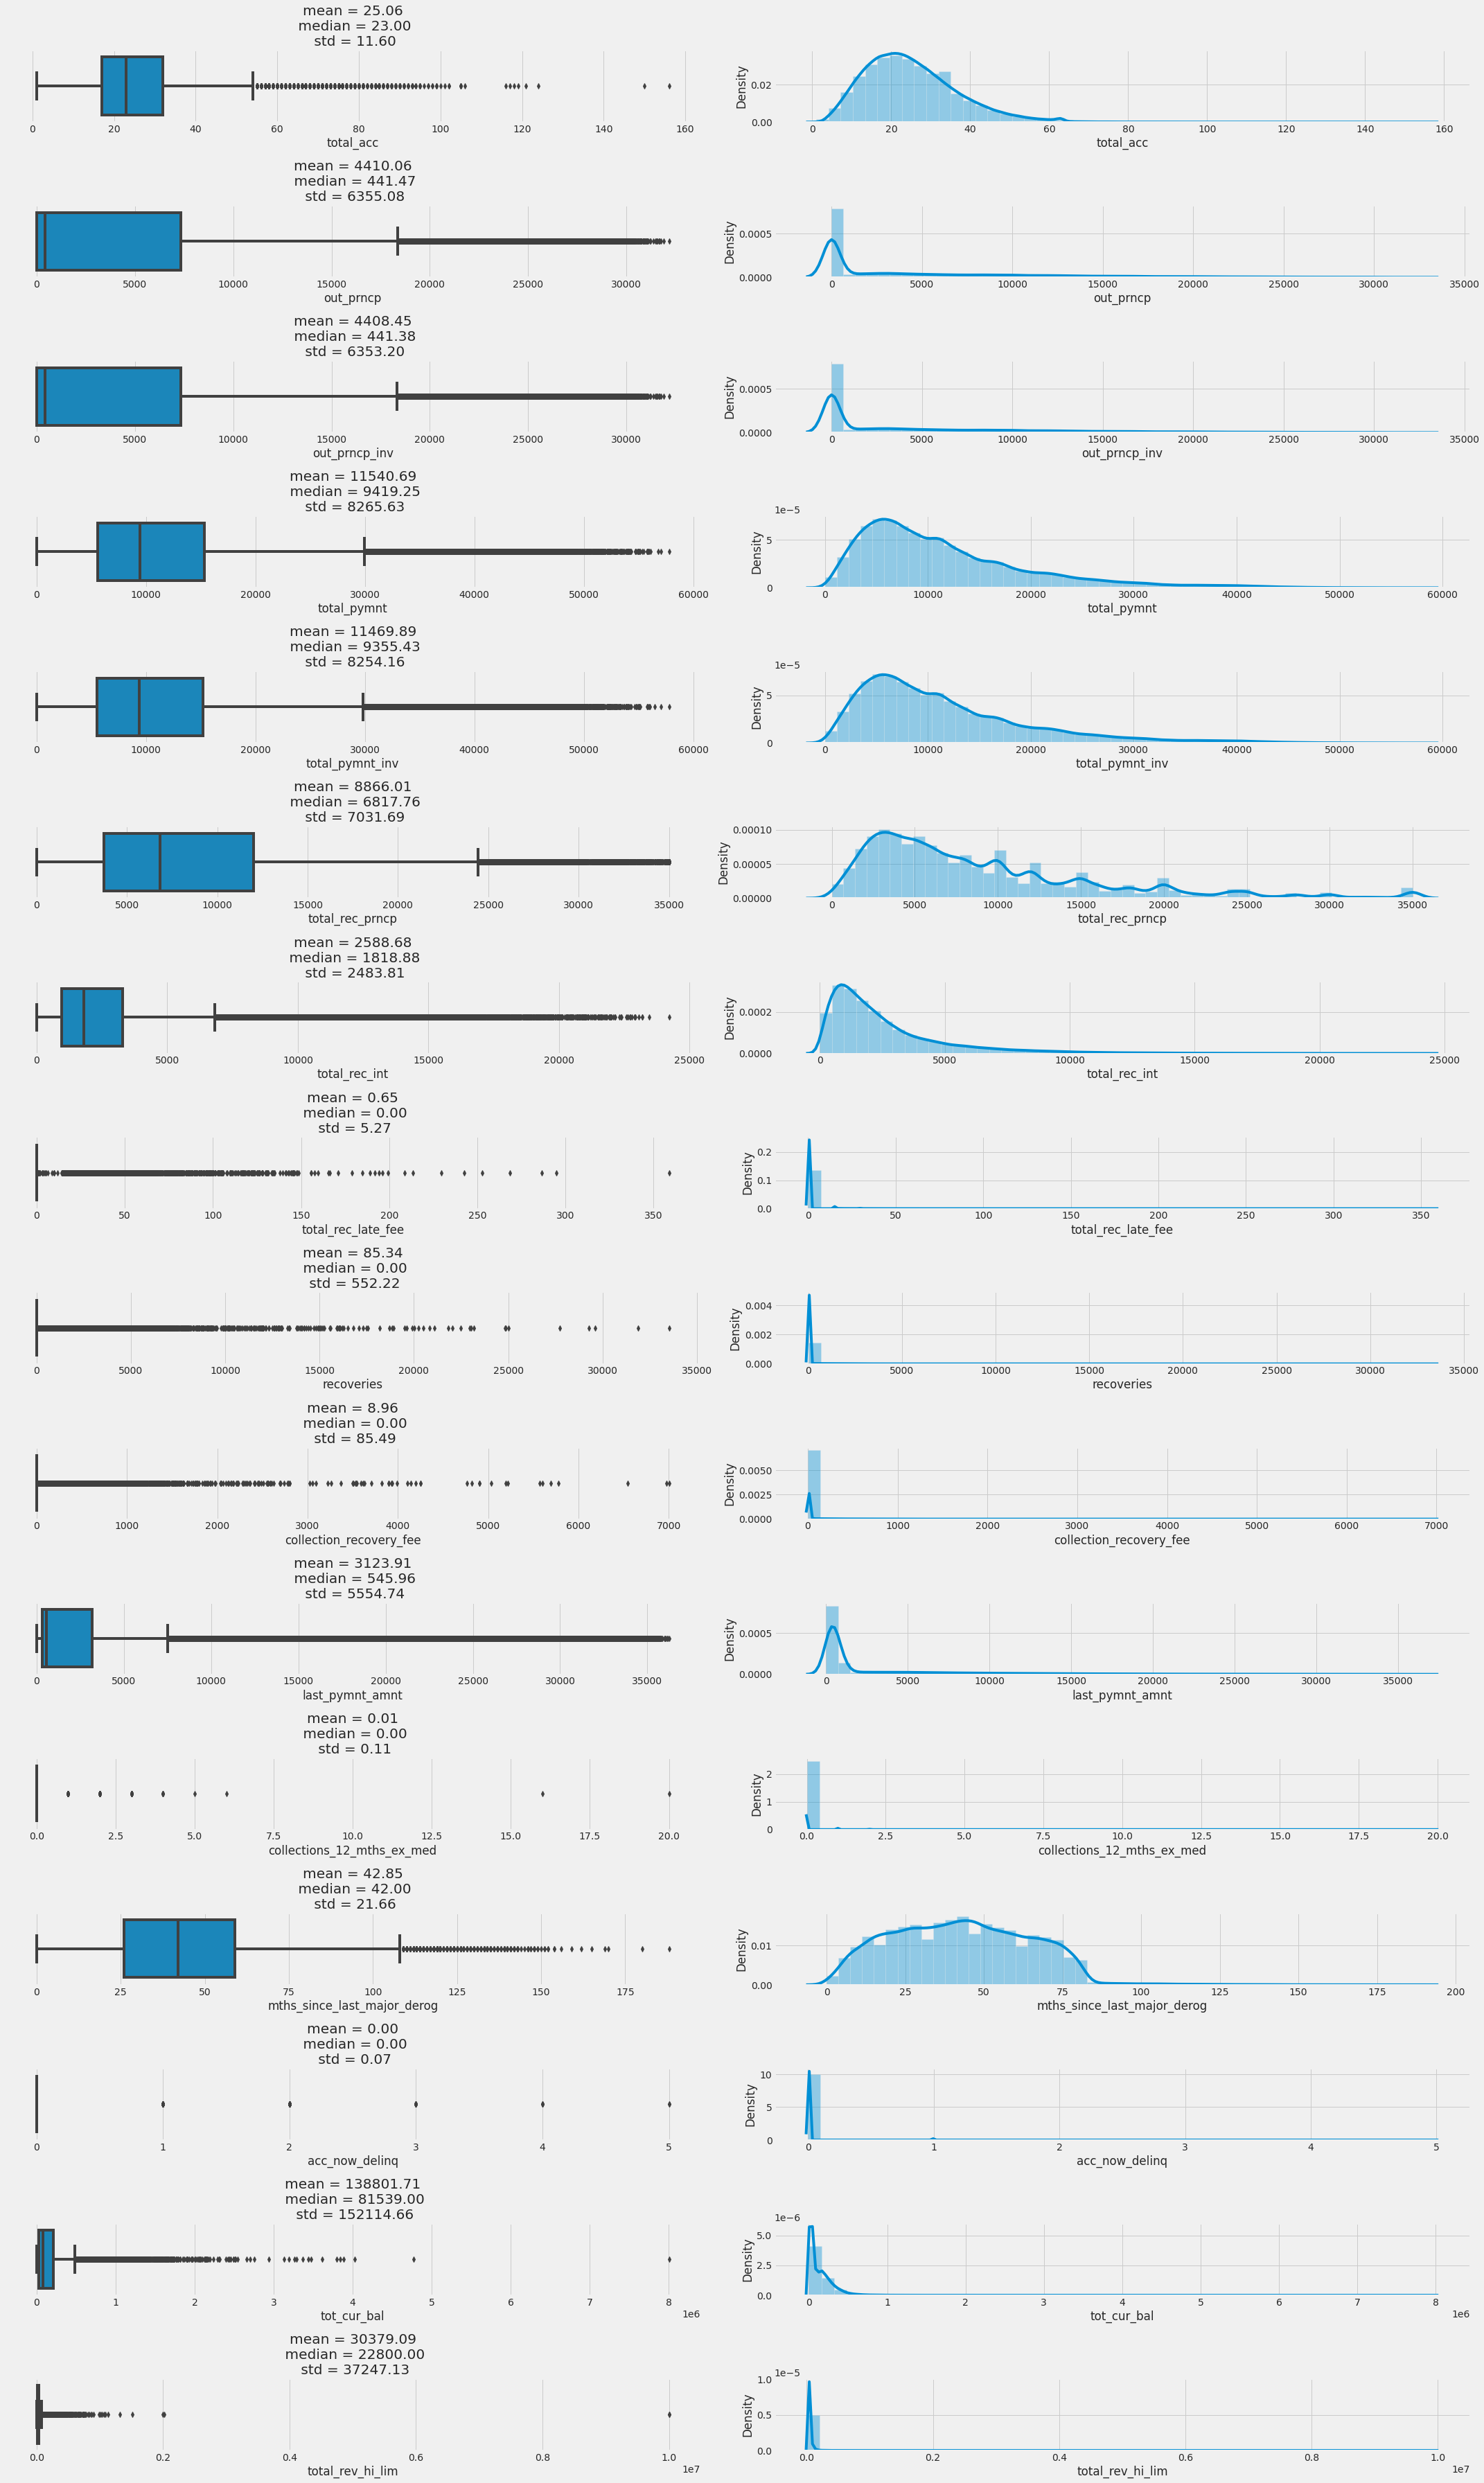

In [ ]:
num_float2 = ['total_acc','out_prncp','out_prncp_inv','total_pymnt',
              'total_pymnt_inv','total_rec_prncp','total_rec_int',
              'total_rec_late_fee','recoveries','collection_recovery_fee',
              'last_pymnt_amnt','collections_12_mths_ex_med',
              'mths_since_last_major_derog','acc_now_delinq','tot_cur_bal',
              'total_rev_hi_lim']


plt.clf()
  
def observasi_num(features):  
    fig, axs = plt.subplots(16, 2, figsize=(30, 50))
    for i, kol in enumerate(features):
	    sns.boxplot(df_load[kol], ax = axs[i][0])
	    sns.distplot(df_load[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df_load[kol].mean(), df_load[kol].median(), df_load[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()   
observasi_num(num_float2)

#**Exploratory Data Analysis numerical x caterogical**

###**term_months**

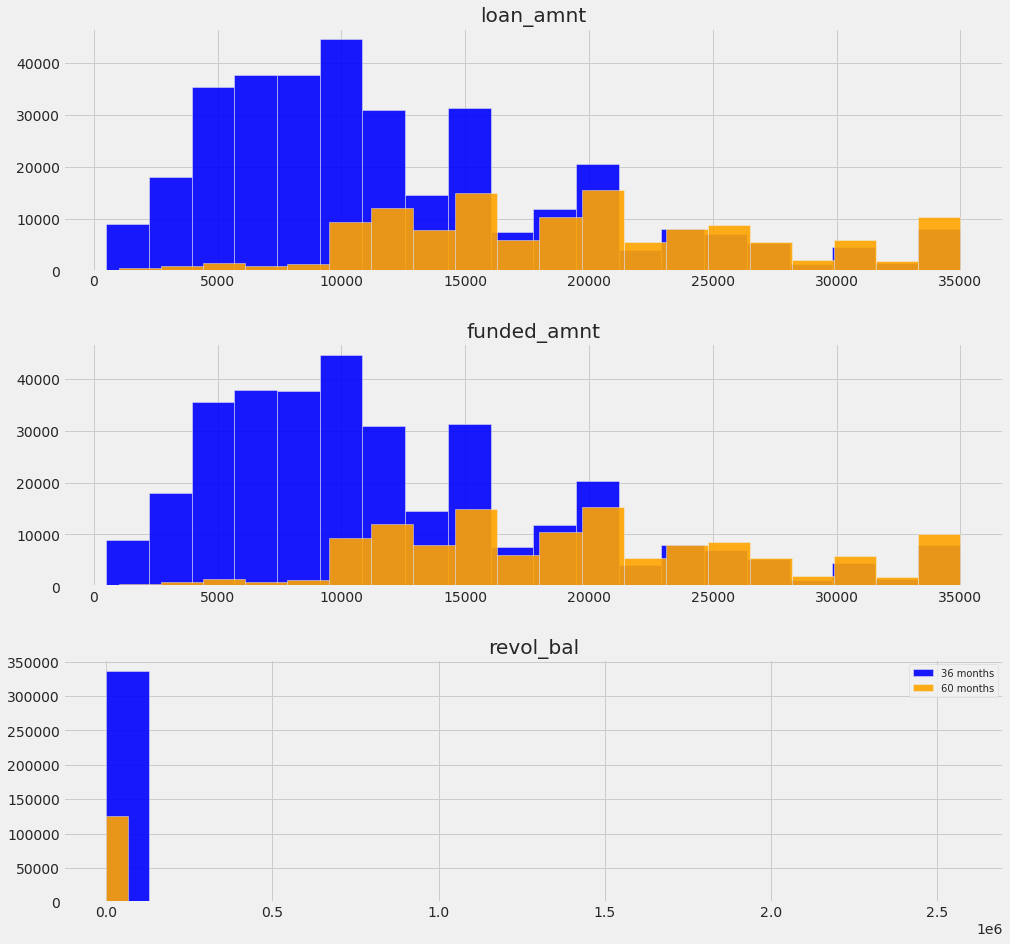

In [ ]:
fig, ax = plt.subplots(3, figsize=(15, 15))

df_load[df_load.term_months == 36][num_int].hist(bins=20, color='blue', alpha=0.9, ax=ax)
df_load[df_load.term_months == 60][num_int].hist(bins=20, color='orange', alpha=0.9, ax=ax)
plt.legend(['36 months', '60 months'], loc='upper right', prop={'size':10})
plt.show()

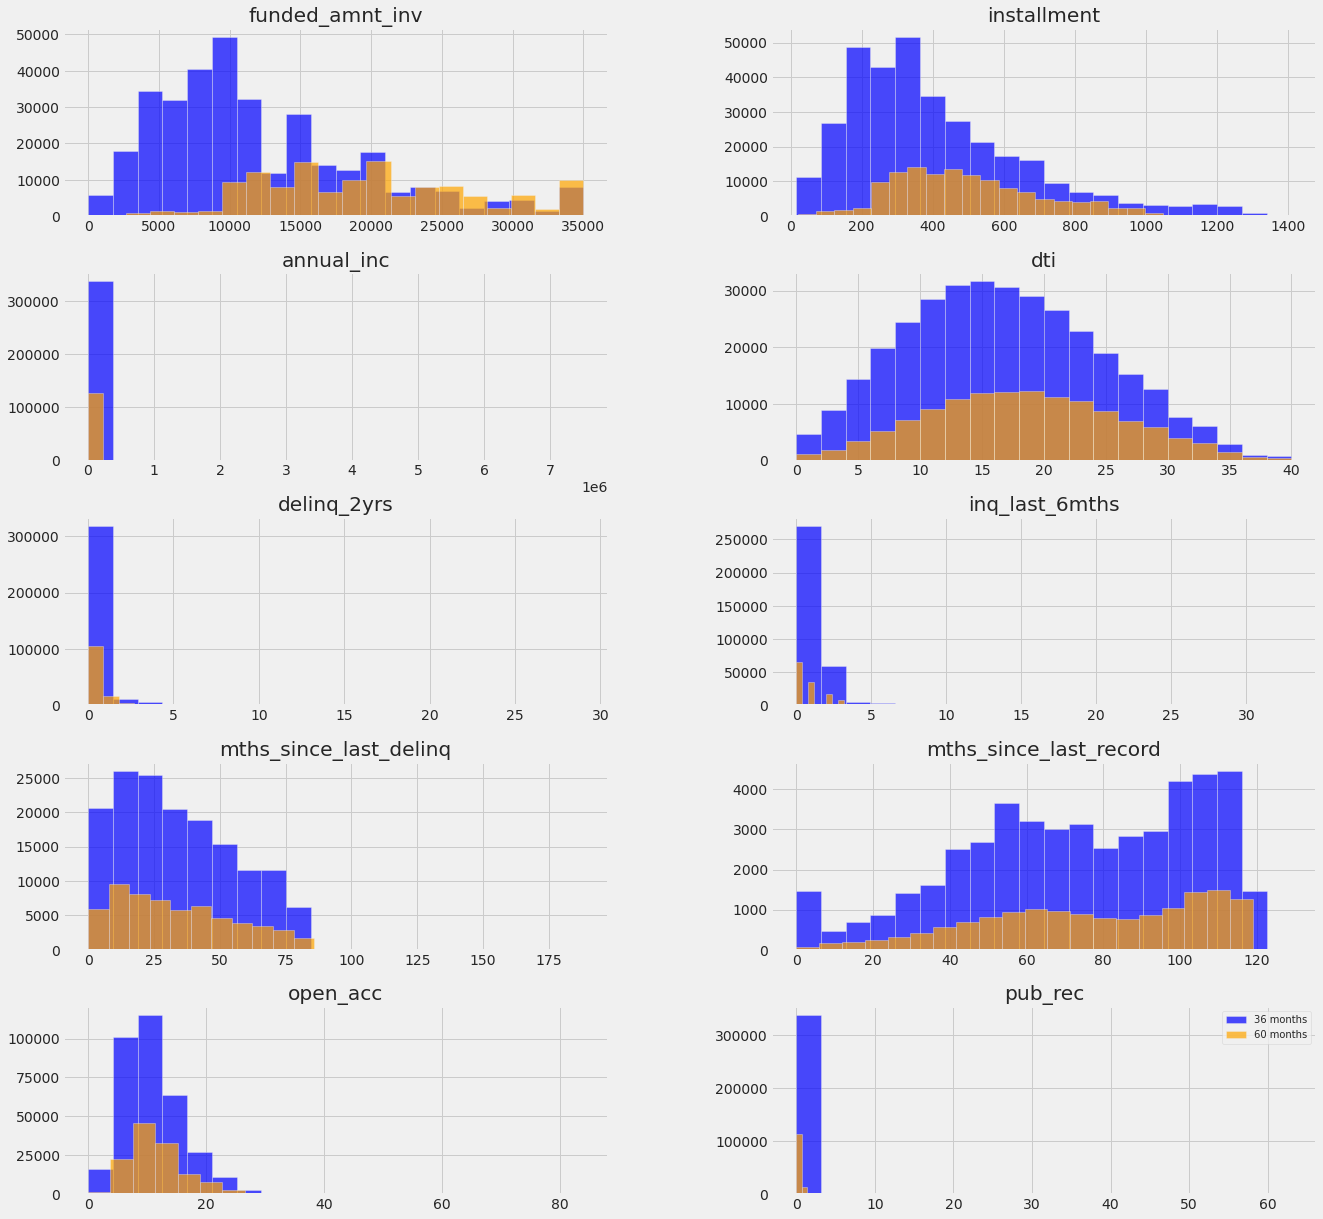

In [ ]:
fig, ax = plt.subplots(5,2, figsize=(20, 20))

df_load[df_load.term_months == 36][num_float].hist(bins=20, color='blue', alpha=0.7, ax=ax)
df_load[df_load.term_months == 60][num_float].hist(bins=20, color='orange', alpha=0.7, ax=ax)
plt.legend(['36 months', '60 months'], loc='upper right', prop={'size':10})

plt.show()

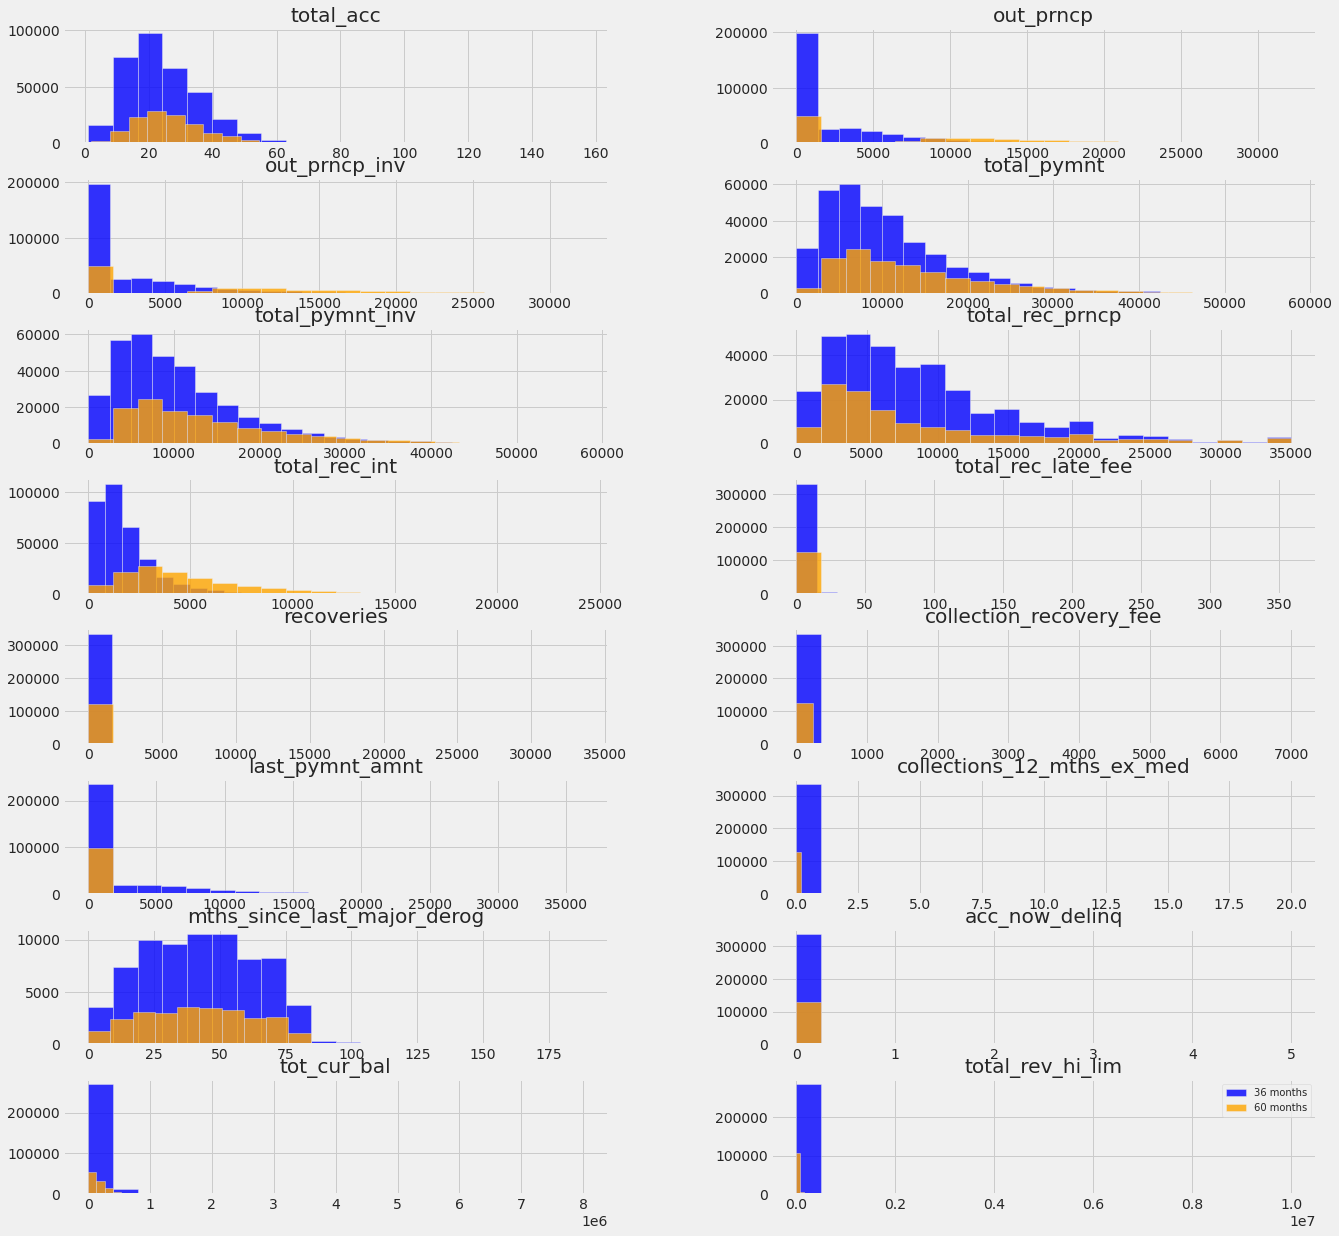

In [ ]:
fig, ax = plt.subplots(8,2, figsize=(20, 20))

df_load[df_load.term_months == 36][num_float2].hist(bins=20, color='blue', alpha=0.8, ax=ax)
df_load[df_load.term_months == 60][num_float2].hist(bins=20, color='orange', alpha=0.8, ax=ax)
plt.legend(['36 months', '60 months'], loc='upper right', prop={'size':10})

plt.show()

###**loan_amt**

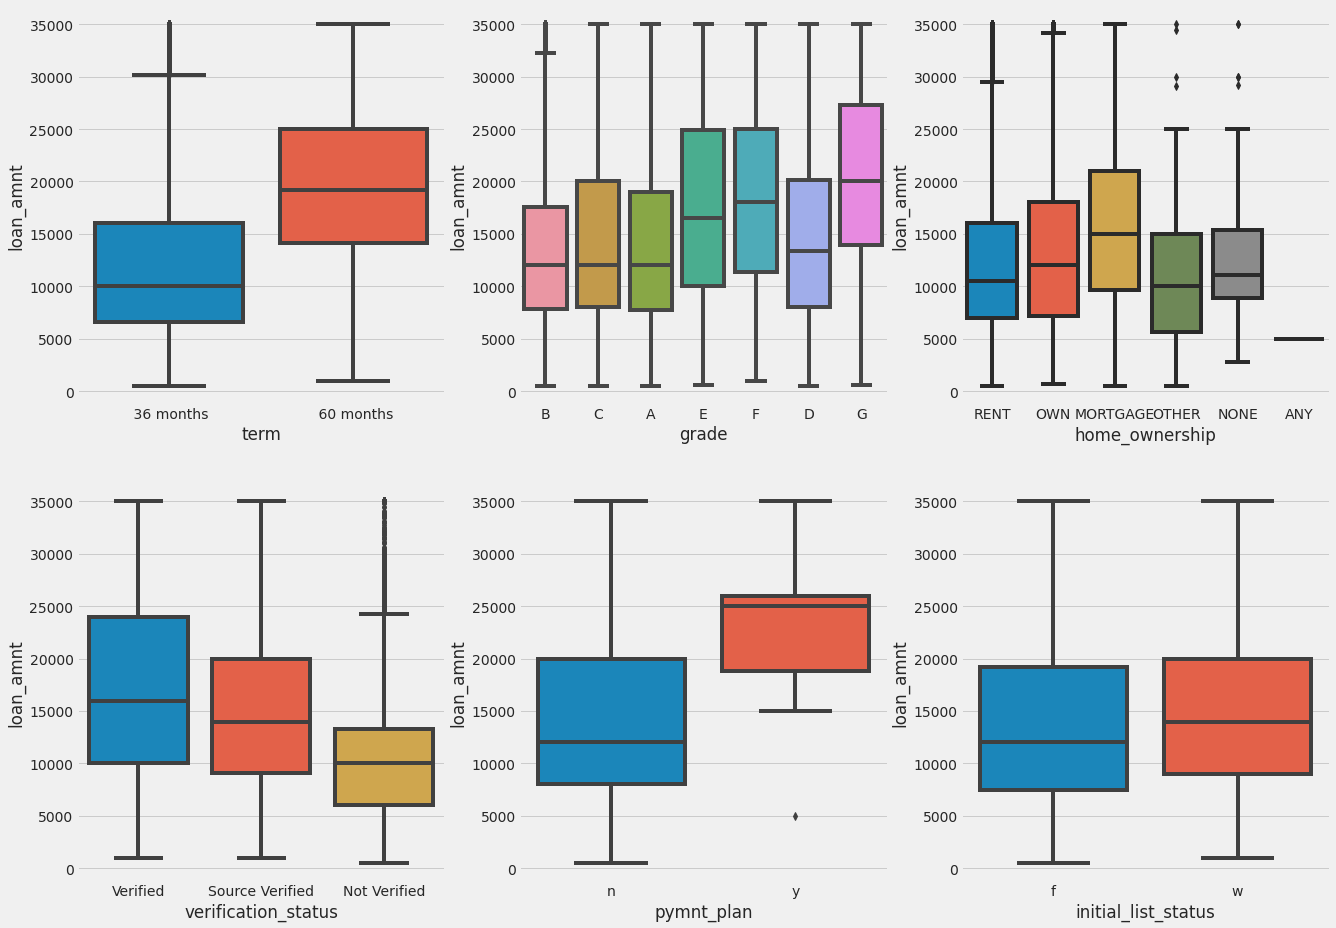

In [93]:
categorical = ['term','grade','home_ownership','verification_status','pymnt_plan','initial_list_status']


fig, ax = plt.subplots(2,3, figsize=(20, 15))
for var, subplot in zip(categorical, ax.flatten()):
  sns.boxplot(x=var, y='loan_amnt', data=df_load, ax=subplot)

plt.show()  

Text(0, 0.5, 'loan_amnt')

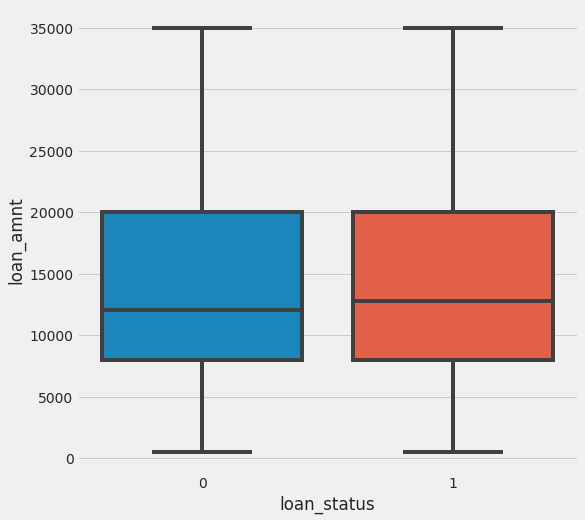

In [92]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_load)
plt.ylabel('loan_amnt')